<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1, Unit 2 (Assignment) --  Recap Hands-on AI I </h2>

**Authors**: Brandstetter, Schäfl<br>
**Date**: 03-16-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

**Copyright statement**: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook
- Check if your model versions are correct

In [1]:
# your imports go here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb

import u2_utils as u2

from functools import partial
from IPython.display import HTML
from pathlib import Path
from PIL import Image, ImageOps
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from torch.utils.data import DataLoader, TensorDataset

/home/fathy/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# model version checks
u2.check_module_versions()

Installed Python version: 3.7 (✓)
Installed numpy version: 1.18.2 (✓)
Installed pandas version: 1.0.0 (✓)
Installed PyTorch version: 1.4.0 (✓)
Installed scikit-learn version: 0.22 (✓)
Installed scipy version: 1.4.0 (✓)
Installed matplotlib version: 3.1.1 (✓)
Installed seaborn version: 0.10.0 (✓)
Installed PIL version: 6.2.0 (✓)


# Exercise 1

- Load the Fashion MNIST dataset.
- Display the first 5 elements of the dataset.
- Create a training and a test dataset (ratio 7:3)
- Print the size of the full data set, the size of the training data set and the size of the test data set

In [3]:
# your code for loading and displaying the Fashion MNIST dataset goes here
fashion_mnist_data = u2.load_fashion_mnist()
fashion_mnist_data[:5]

,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,item_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
np.random.seed(42)
# your subsequent code goes here
fashion_mnist_train, fashion_mnist_test = u2.split_data(fashion_mnist_data, test_size=0.3)

print(f'Full data set is of size: {fashion_mnist_data.shape[0]}')
print(f'Training subset is of size: {fashion_mnist_train.shape[0]}')
print(f'Testing subset is of size: {fashion_mnist_test.shape[0]}')

Full data set is of size: 70000
Training subset is of size: 49000
Testing subset is of size: 21000


# Exercise 2

- Downproject the training data to two dimensions 
- Visualize the ten classes in this downprojection
- For the remaining exercise create two data sets (fashion_mnist_train_pca, fashion_mnist_test_pca) which are downprojected versions of the original dataset. NOTA BENE: the downprojected dimension should be 10 now!

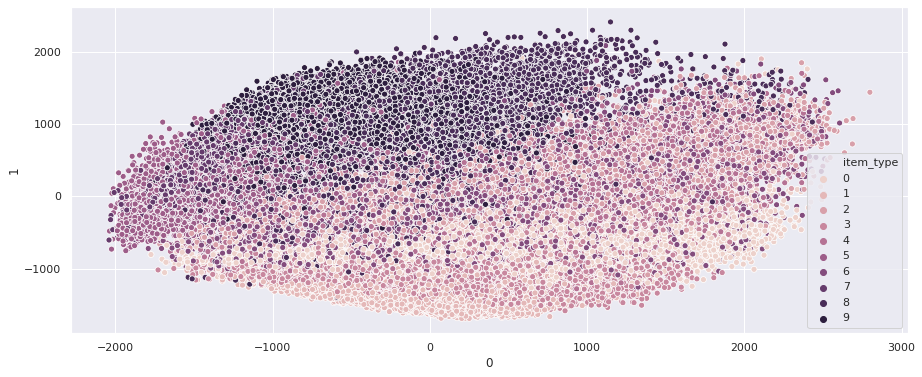

In [5]:
np.random.seed(seed=42)
# your code goes here
fashion_mnist_train_pca = u2.apply_pca(n_components=2, data=fashion_mnist_train, target_column=r'item_type')
u2.plot_points_2d(data=fashion_mnist_train_pca, target_column=r'item_type', figsize=(15, 6))

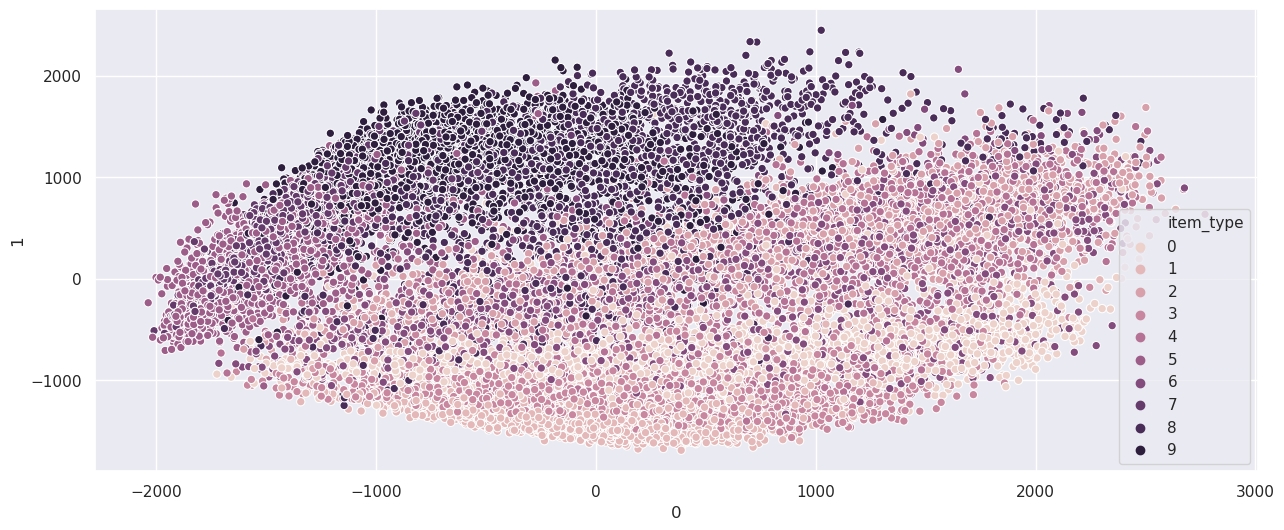

In [6]:
np.random.seed(seed=42)
# your code goes here
fashion_mnist_test_pca = u2.apply_pca(n_components=2, data=fashion_mnist_test, target_column=r'item_type')
u2.plot_points_2d(data=fashion_mnist_test_pca, target_column=r'item_type', figsize=(15, 6))

# Exercise 3

- Run the $k$-nearest neighbor classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the Naive Bayes classifier and report the results on the training and on the test dataset

Score (k = 001): 0.4545238095238095


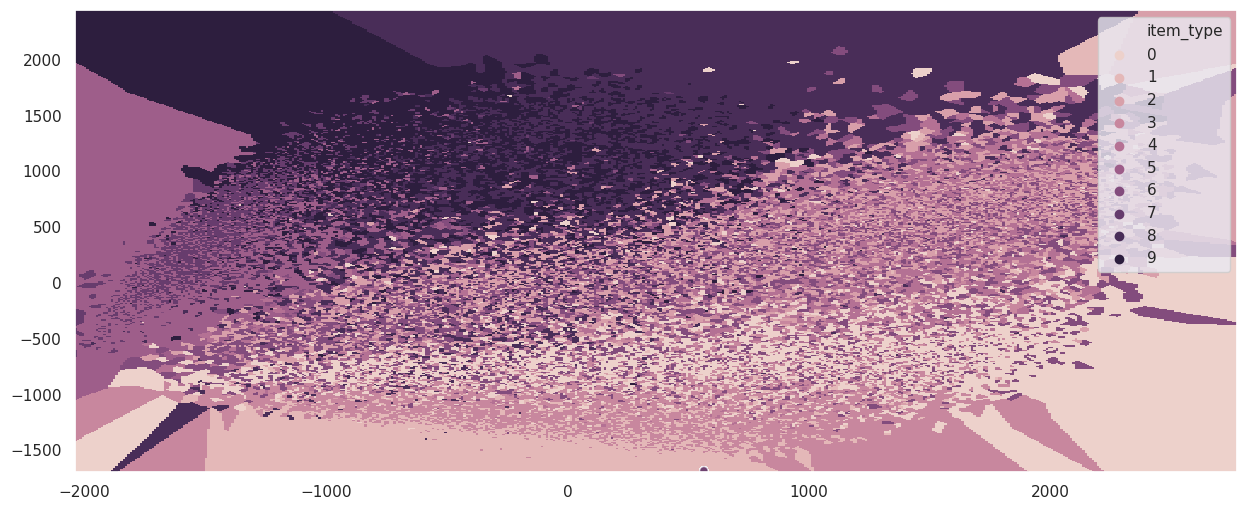

Score (k = 002): 0.46585714285714286


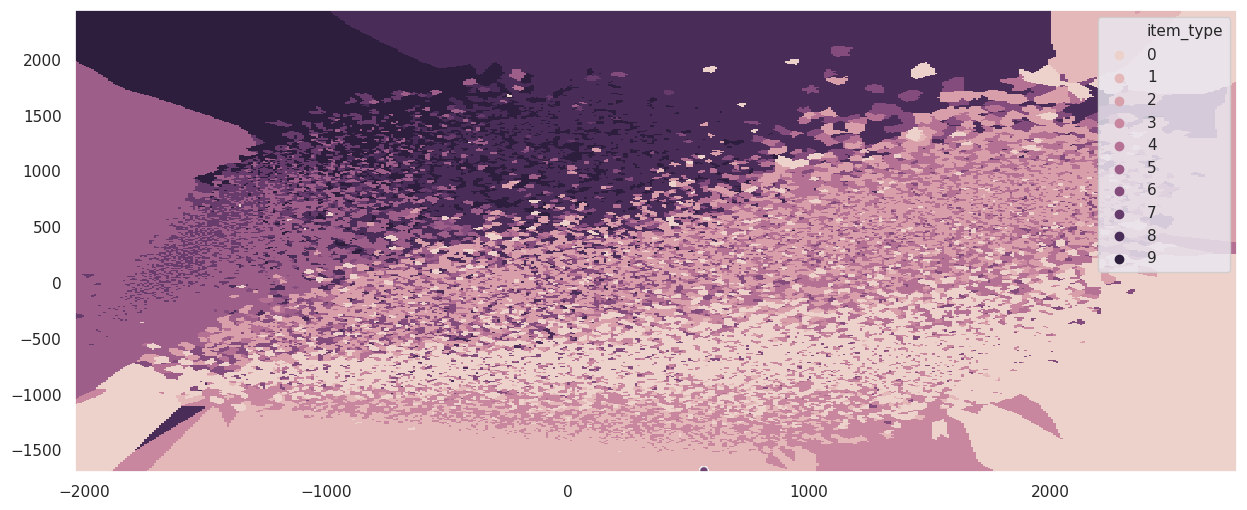

Score (k = 004): 0.5046666666666667


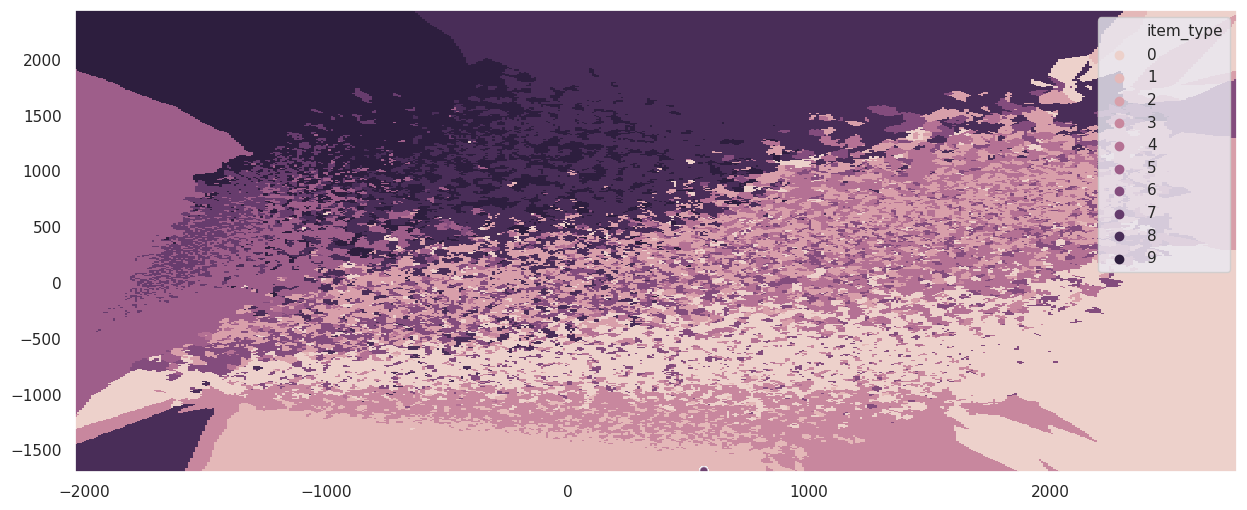

Score (k = 008): 0.5324285714285715


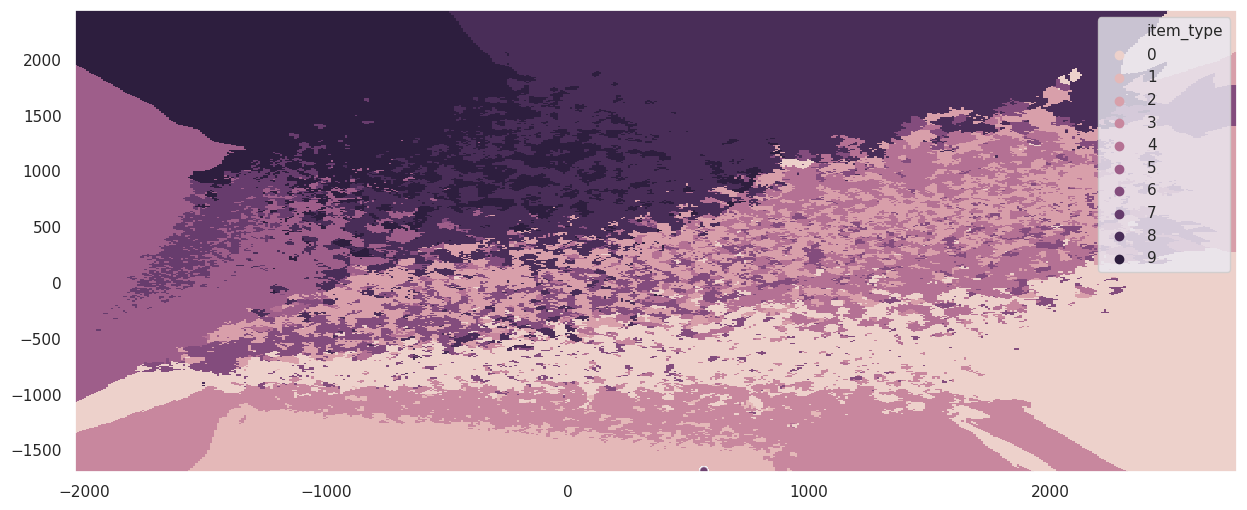

Score (k = 016): 0.5491904761904762


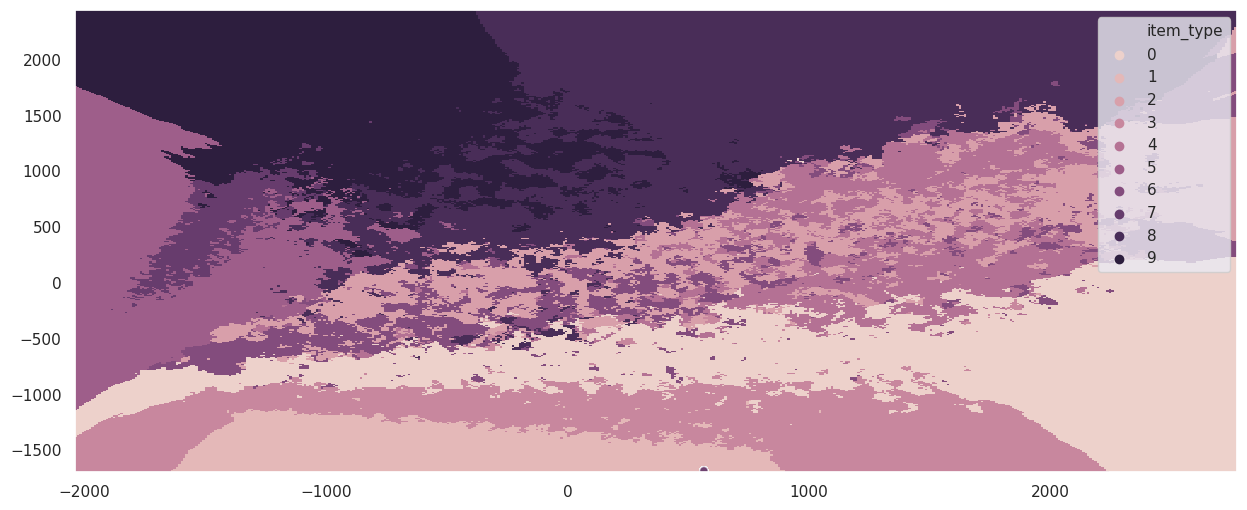

Score (k = 032): 0.561


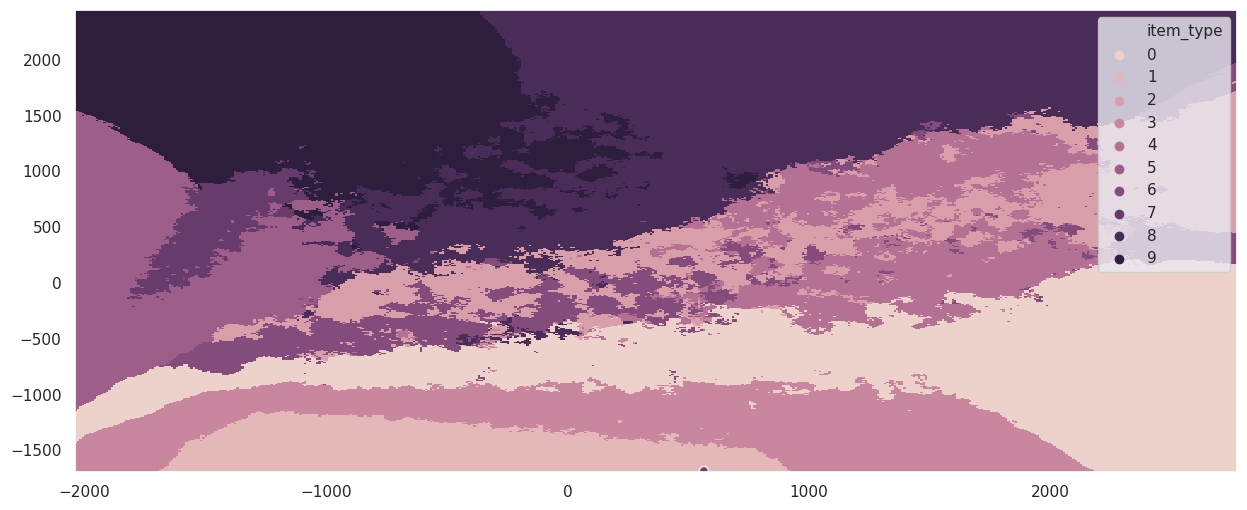

Score (k = 064): 0.5615714285714286


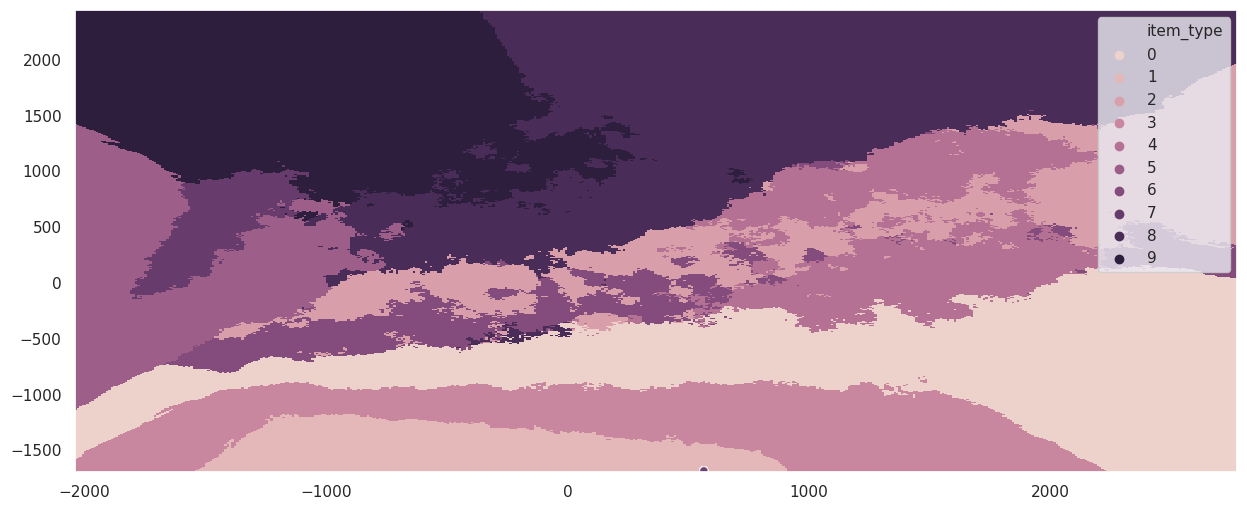

Score (k = 128): 0.5655238095238095


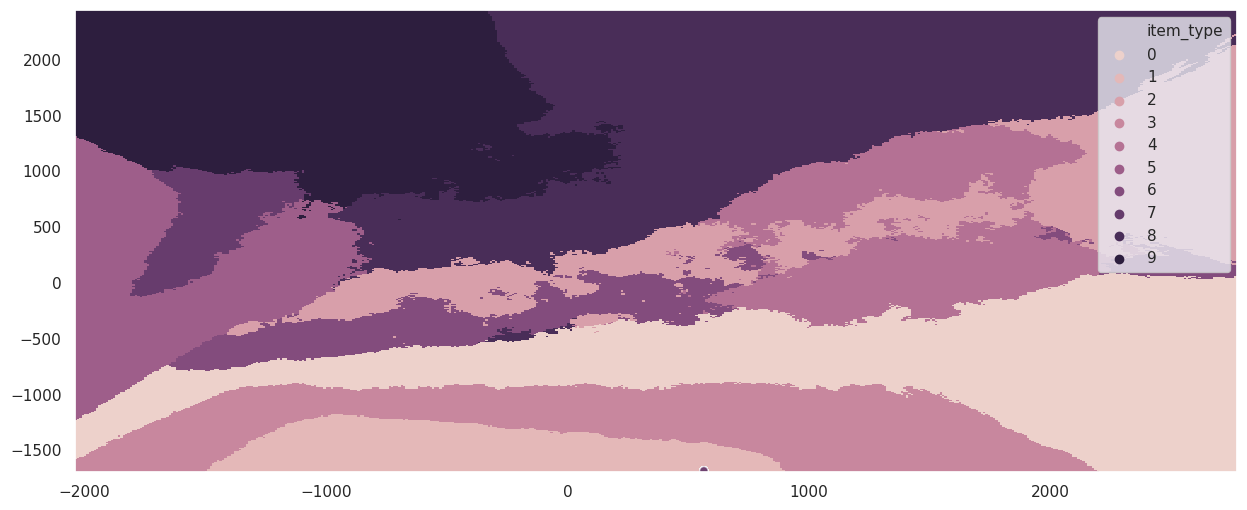

Score (k = 256): 0.5678571428571428


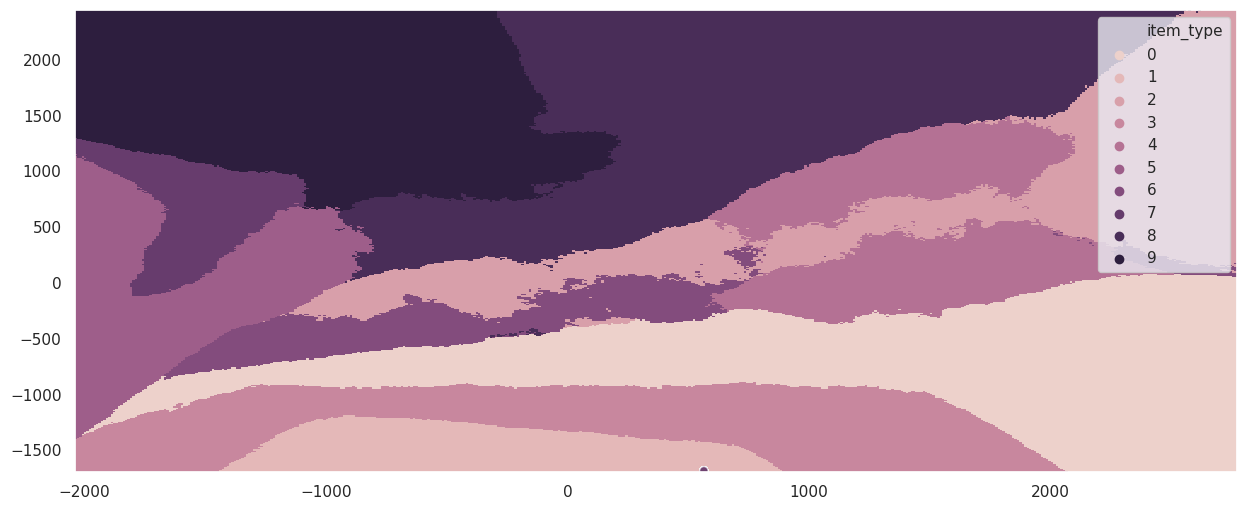

Score (k = 512): 0.5647619047619048


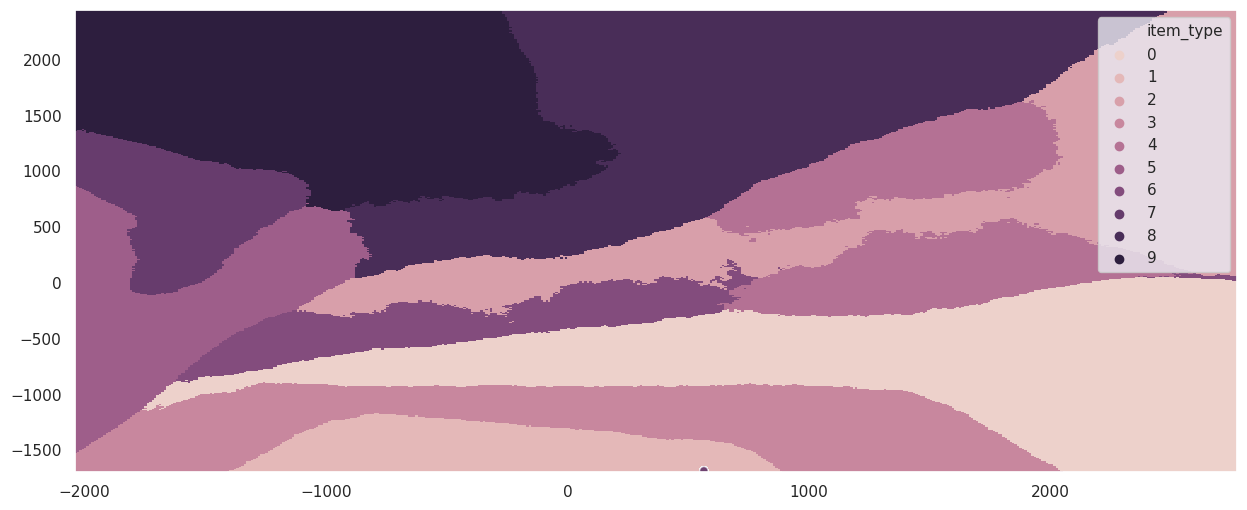

In [7]:
np.random.seed(42)
k_range = [1,2,4,8,16,32,64,128,256,512]
# your code goes here
for n_neighbors in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
    knn_score = knn_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
    print(f'Score (k = {str(n_neighbors).zfill(len(str(max(k_range))))}): {knn_score}')
    u2.plot_decision_boundaries(data=fashion_mnist_test_pca, classifier=knn_classifier, granularity=10.0, figsize=(15, 6))


Score: 0.5064761904761905


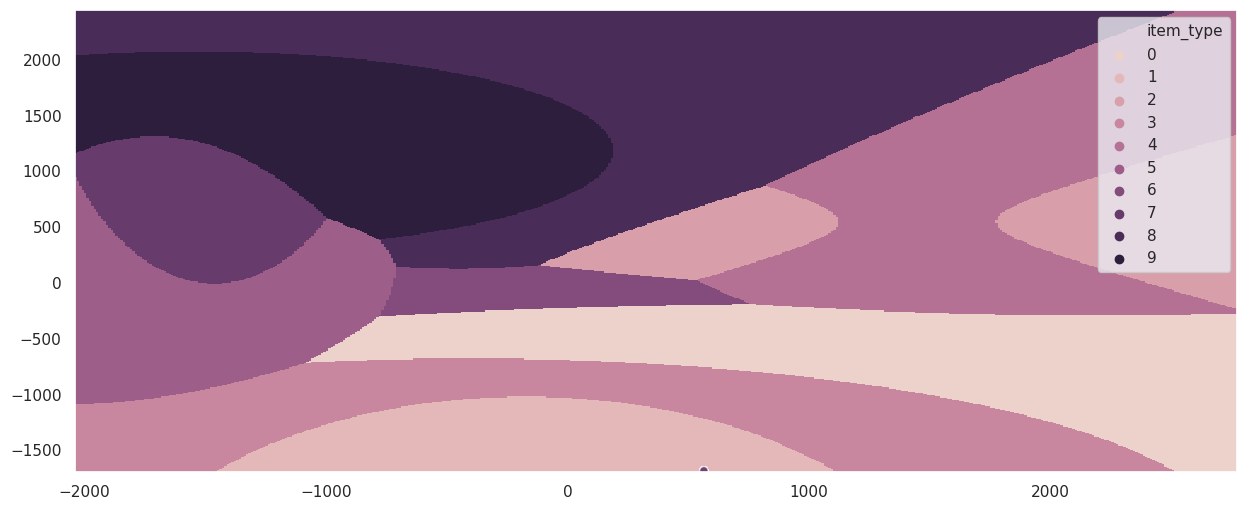

In [8]:
np.random.seed(42)
# your code goes here
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
naive_bayes_score = naive_bayes_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
print(f'Score: {naive_bayes_score}')
u2.plot_decision_boundaries(data=fashion_mnist_test_pca, classifier=naive_bayes_classifier, granularity=10.0, figsize=(15, 6))

# Exercise 4

- Run the Random Forest classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the XGBoost classifier and report the results on the training and on the test dataset

In [9]:
np.random.seed(42)
# your code goes here
k_range = [1,2,4,8,16,32,64,128,256,512]
for n_estimator in k_range:
    random_forest_classifier = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1)
    random_forest_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
    random_forest_score = random_forest_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
    print(f'Score (n = {str(n_estimator).zfill(len(str(max(k_range))))}): {random_forest_score}')


Score (n = 001): 0.4573333333333333
Score (n = 002): 0.4617142857142857
Score (n = 004): 0.4817619047619048
Score (n = 008): 0.4952857142857143
Score (n = 016): 0.5054285714285714
Score (n = 032): 0.5087142857142857
Score (n = 064): 0.5094285714285715
Score (n = 128): 0.5102380952380953
Score (n = 256): 0.5119523809523809
Score (n = 512): 0.5129047619047619


In [10]:
np.random.seed(42)
# your code goes here
np.random.seed(42)
xgboost_classifier = xgb.XGBClassifier(max_depth=7, min_child_weight=1, learning_rate=0.1, n_estimators=192, silent=True, objective=r'binary:logistic',
                                       gamma=0, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=0,
                                       scale_pos_weight=1, seed=1, missing=None)
xgboost_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
xgboost_score = xgboost_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
print(f'Score: {xgboost_score}')

Score: 0.5596190476190476


# Exercise 5

- Write a Python function for the following function (which gets a Weierstrass function for $n\rightarrow\infty$):
\begin{align}
    &f(x) = \sum_{n=1}^{55} \frac{2^k \sin(2^k x)}{3^k}
\end{align}

- Plot the function. Additionally, generate 300 random samples and evaluate the function in the same plot.
- Fit the function with the polynomials of degree 5, 10, 20, 50, 100. Which polynomial describes the data best? (DISCUSS) Plot all the information in one plot.

In [11]:
def function(x):
    # your function goes here
    
    return np.sum([np.power(2, n) * np.sin(np.power(2, n) *x)/np.power(3,n) for n in range(55)], axis=0)

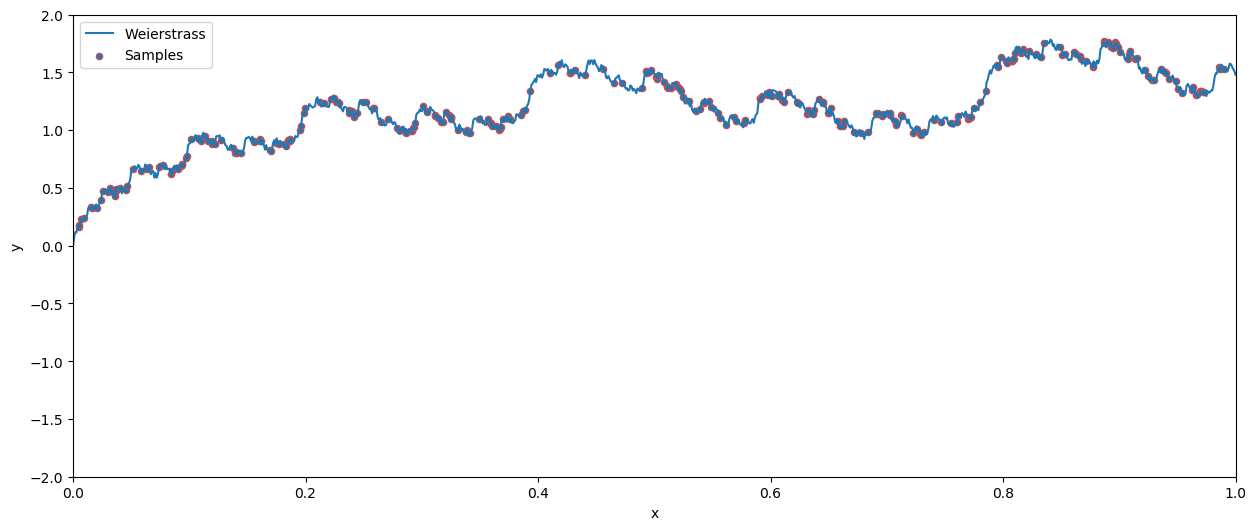

In [12]:
# your plot of random generated samples and the evaluation of the Weierstrass-like function goes here
np.random.seed(42)
x = np.sort(np.random.rand(300))
y = function(x=x)

# Plot Weierstrass function.
fig = plt.figure(figsize=(15, 6))
function_range = np.linspace(0, 1, 1000)
plt.plot(function_range, function(x=function_range), label=r'Weierstrass')
plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

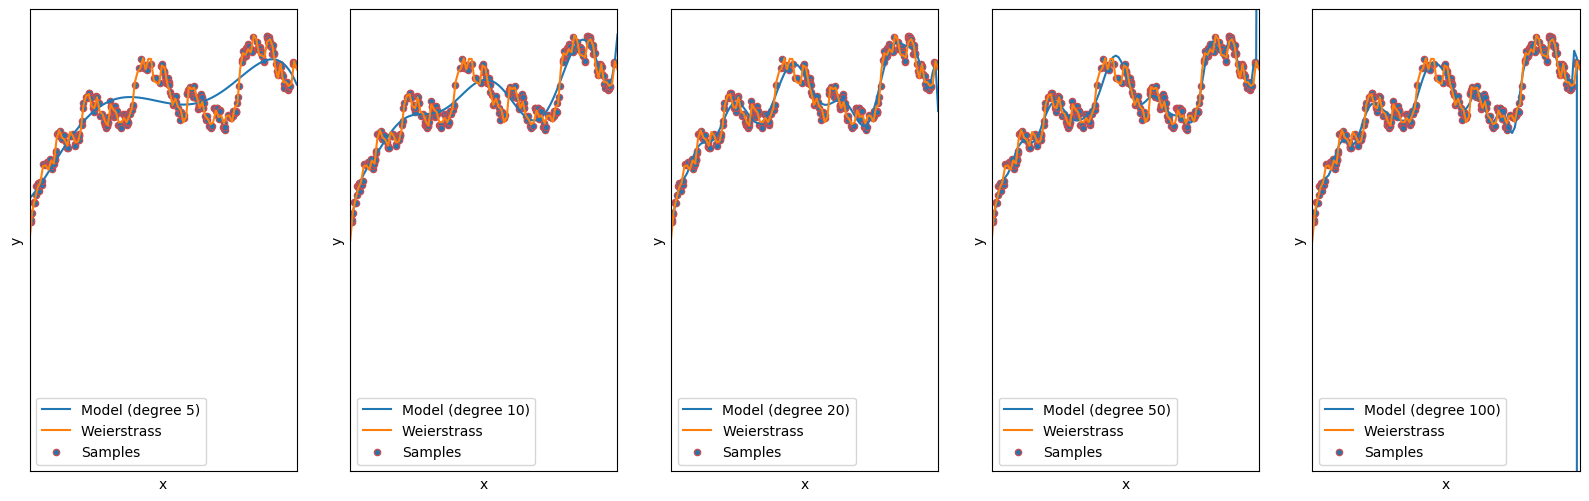

In [13]:
np.random.seed(42)
degrees = [5,10,20,50,100]

plt.figure(figsize=(20, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Fit a polynomial with respect to our sample data.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([(r'polynomial_features', polynomial_features),
                         (r'linear_regression', linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Create subplot and show result of currently fitted model.
    function_range = np.linspace(0, 1, 100)
    label = f'Model (degree {degrees[i]})'
    plt.plot(function_range, pipeline.predict(function_range[:, np.newaxis]),label=label)
    plt.plot(function_range, function(function_range), label=r'Weierstrass')
    plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc=r'best')
plt.show()
# your plot

# Exercise 6

- Read in the image 'horse.jpg' and turn it into a greyscale image
- Apply the following filters:
\begin{equation}G_x = \left( 
    \begin{array}{rrrrr}                                
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2
    \end{array}\right)
\end{equation}

\begin{equation}G_y = \left( 
    \begin{array}{rrrrr}                                
         -2 &  -2 &  -2 &  -2  &  -2  \\
         -1 &  -1 &  -1 &  -1  &  -1  \\
        0.0 & 0.0 & 0.0 & 0.0  & 0.0  \\
          1 &   1 &   1 &   1  &   1  \\
          2 &   2 &   2 &   2  &   2
    \end{array}\right)
\end{equation}

- Apply the ReLU activation function to "switch" pixels on and off
- Make a max pool operation with kernel-size 8
- Make 7 plots: the greyscale image, an image with $G_x$ applied, an image with $G_y$ applied, an image with $G_x$+ReLU, an iamge with $G_y$+ReLU, an image with $G_x$+ReLU+maxpool, and an iamge with $G_y$+ReLU+maxpool

In [14]:

# your kernels/filters go here
custom_kernel_x =np.array([[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0]])
custom_kernel_y =np.array([[-2.0,-2.0,-2.0,-2.0,-2.0],[-1.0,-1.0,-1.0,-1.0,-1.0],[0.0,0.0,0.0,0.0,0.0],[1.0,1.0,1.0,1.0,1.0],[2.0,2.0,2.0,2.0,2.0]])

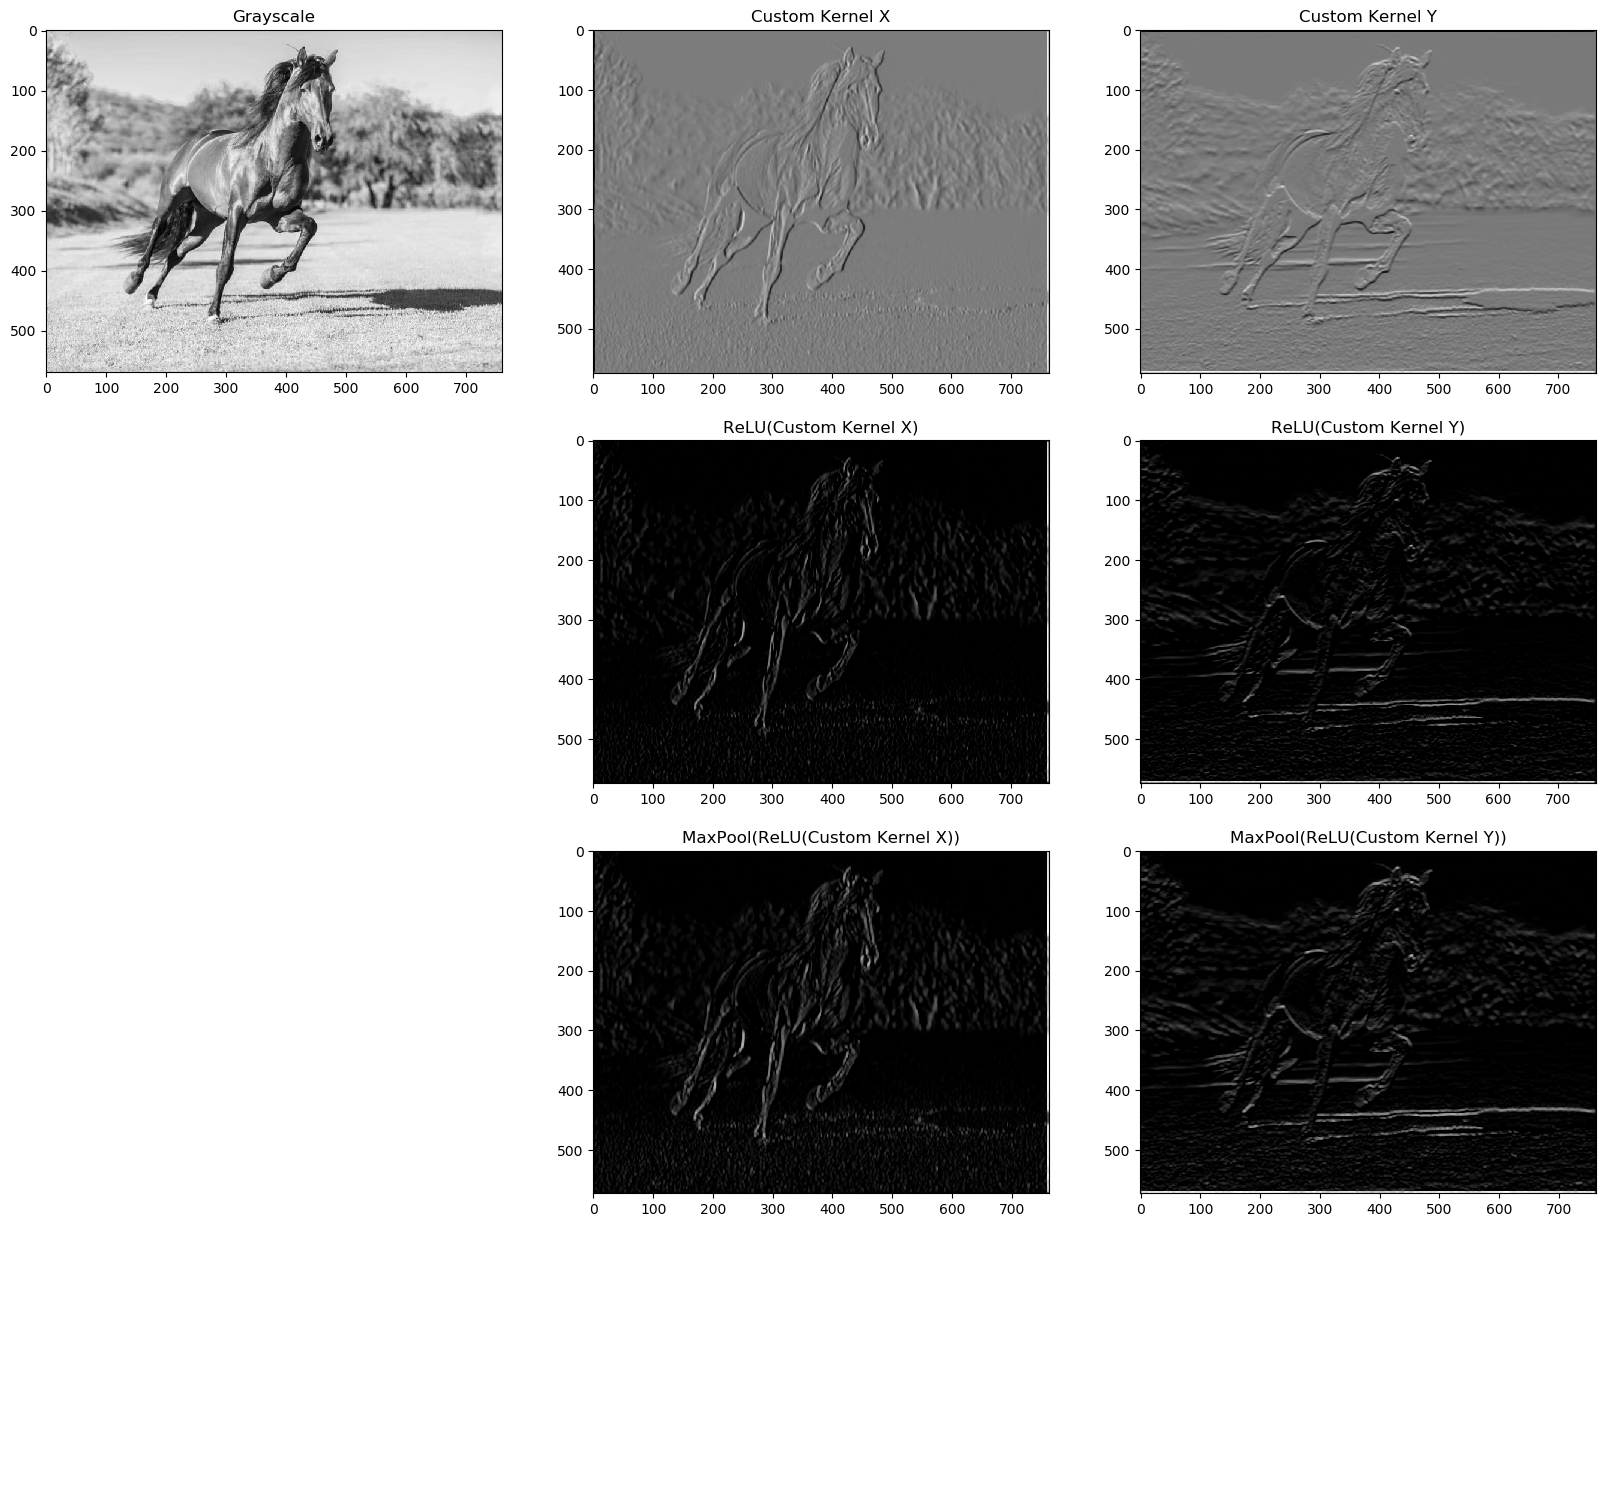

In [15]:
# your plotting code goes here
image_path = r'horse.jpg'
with Image.open(image_path) as image_data:
    image_charlie = ImageOps.grayscale(image_data)

# Define figure and corresponding attributes.
fig, ax = plt.subplots(3, 3, figsize=(20, 22.5))
plt.subplots_adjust(hspace=-0.55)
ax[1, 0].axis(r'off')
ax[2, 0].axis(r'off')
ax[0, 0].set_title(r'Grayscale')
ax[0, 1].set_title(r'Custom Kernel X')
ax[0, 2].set_title(r'Custom Kernel Y')
ax[1, 1].set_title(r'ReLU(Custom Kernel X)')
ax[1, 2].set_title(r'ReLU(Custom Kernel Y)')
ax[2, 1].set_title(r'MaxPool(ReLU(Custom Kernel X))')
ax[2, 2].set_title(r'MaxPool(ReLU(Custom Kernel Y))')

# Show grayscale image of Charlie.
_ = ax[0, 0].imshow(image_charlie, cmap=r'gray')

# Apply ReLU to grayscale image of Charlie.
filtered_charlie_x = signal.convolve2d(np.array(image_charlie), custom_kernel_x)
activated_charlie_x = torch.relu(torch.tensor(filtered_charlie_x))
_ = ax[0, 1].imshow(filtered_charlie_x, cmap=r'gray')
_ = ax[1, 1].imshow(activated_charlie_x, cmap=r'gray')

reshaped_charlie_x = activated_charlie_x.unsqueeze(0).unsqueeze(0)
pooled_charlie_x = torch.max_pool2d(reshaped_charlie_x, kernel_size=2, stride=1)
_ = ax[2, 1].imshow(pooled_charlie_x.squeeze(), cmap=r'gray')

filtered_charlie_y = signal.convolve2d(np.array(image_charlie), custom_kernel_y)
activated_charlie_y = torch.relu(torch.tensor(filtered_charlie_y))
_ = ax[0, 2].imshow(filtered_charlie_y, cmap=r'gray')
_ = ax[1, 2].imshow(activated_charlie_y, cmap=r'gray')

reshaped_charlie_y = activated_charlie_y.unsqueeze(0).unsqueeze(0)
pooled_charlie_y = torch.max_pool2d(reshaped_charlie_y, kernel_size=2, stride=1)
_ = ax[2, 2].imshow(pooled_charlie_y.squeeze(), cmap=r'gray')

# Exercise 7

- Implement the following convolutional network architecture: <br>
1) one convolutional layer with 10 kernels and kernel size of 5 <br>
2) a ReLU activation function <br>
3) one pooling layer with which max pools out of 2 times 2 pixels <br>
4) one convolutional layer with 20 kernels and kernel size of 5 <br>
5) a ReLU activation function <br>
6) one pooling layer with which max pools out of 2 times 2 pixels <br>
7) one fully connected layer with 200 output units <br>
8) a ReLU activation function <br>
9) one fully connected layer with 200 input units and 10 output units <br><br>

- Run your CNN on the complete Fashion MNIST dataset for 5 epochs
- Report your results on the training set after each epoch
- Run you final model on the test set, also report you results

In [16]:
class your_CNN(nn.Module):
    
    def __init__(self):
        super(your_CNN, self).__init__()
        # your layers go here 
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.fc1 = nn.Linear(20*4*4,200)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc2 = nn.Linear(200,10)
    def forward(self, x):
        
        # your forward pass goes here
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x,2,2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x,2,2)
        x = x.view(-1, 20*4*4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [17]:
image_width = int(np.sqrt(len(fashion_mnist_train.iloc[0])))

# Create instance of Dataloader (training set).
fashion_mnist_loader_train = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_train), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=True, drop_last=False)

# Create instance of Dataloader (test set).
fashion_mnist_loader_test = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_test), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=False, drop_last=False)

In [18]:
np.random.seed(42)
torch.manual_seed(42)

target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = your_CNN().to(target_device)
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train and evaluate CNN on Fashion-MNIST data.
num_epochs = 5
for epoch in range(num_epochs):
    
    # Train CNN for one epoch.
    u2.train_network(model=cnn_model, data_loader=fashion_mnist_loader_train,
                     device=target_device, optimizer=optimizer)
    
    # Evaluate current CNN model on training data set.
    performance = u2.test_network(
        model=cnn_model, data_loader=fashion_mnist_loader_train, device=target_device)
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u2.test_network(
    model=cnn_model, data_loader=fashion_mnist_loader_test, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy: {performance[1]:.4f}')


Epoch: 1 / Loss: 0.0029 / Accuracy: 0.8666
Epoch: 2 / Loss: 0.0025 / Accuracy: 0.8770
Epoch: 3 / Loss: 0.0021 / Accuracy: 0.9047
Epoch: 4 / Loss: 0.0019 / Accuracy: 0.9119
Epoch: 5 / Loss: 0.0018 / Accuracy: 0.9175

Final loss: 0.0025 / Final accuracy: 0.8860
